In [27]:
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import math
from collections import Counter

class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for sample in X:
            distances = []
            for x_train in self.X_train:
                distance = np.sqrt(np.sum((sample - x_train)**2))
                distances.append(distance)
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            most_common_label = Counter(k_nearest_labels).most_common(1)
            y_pred.append(most_common_label[0][0])
        return y_pred

# Load the images and labels
X = []
y = []


def extract_features(image, max_keypoints=400):
    orb = cv2.ORB_create(nfeatures=max_keypoints)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256, 256)) 
    kp, des = orb.detectAndCompute(img, None)
    if des is None:
        des = np.zeros((max_keypoints, 32), dtype=np.uint8)
    else:
        n_keypoints = des.shape[0]
        if n_keypoints < max_keypoints:
            des = np.vstack([des, np.zeros((max_keypoints - n_keypoints, 32), dtype=np.uint8)])
    return des.flatten()

for label in ["chicken", "dog"]:
    for i in range(1, 1501):
        try:
            img = cv2.imread(f"./dogAndChicken/{label}/{i}.jpeg")
            X.append(extract_features(img)) 
            y.append(label)
        except:
            continue

# Convert the data to numpy arrays
X = np.array(X)
y = np.array(y)

print("Input size: ", len(X))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN model
model = KNN(k=int(math.sqrt(len(X))))
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion matrix:\n{confusion}")

Input size:  3000
Accuracy: 0.60
Confusion matrix:
[[122 191]
 [ 47 240]]


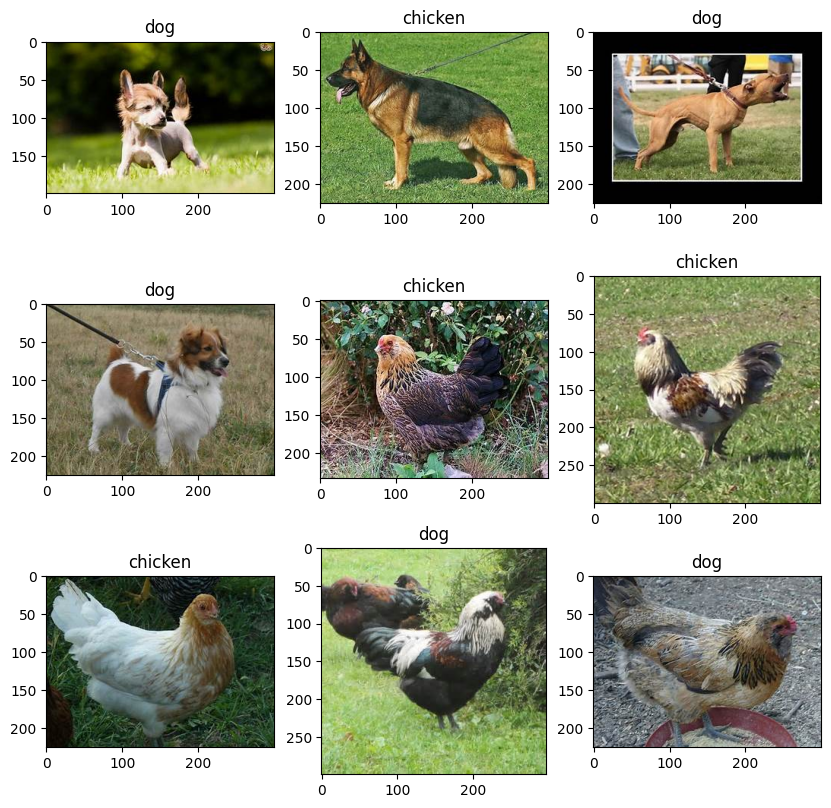

In [28]:
# Make predictions on new images
import os
from matplotlib import pyplot as plt
folder_path = 'dogAndChicken/validate/'
file_list = [f for f in os.listdir(folder_path) if f.endswith('.jpeg')]

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, f in enumerate(file_list[:9]):
    file_path = os.path.join(folder_path, f)
    img = cv2.imread(file_path)
    features = extract_features(img)
    label = model.predict([features])[0]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i//3, i%3].imshow(img)
    axs[i//3, i%3].set_title(label)

plt.show()

In [15]:
# Make predictions on new images
img = cv2.imread("102.jpeg")
features = extract_features(img)
label = model.predict([features])[0]
print(f"Prediction: {label}")

Prediction: dog
